# 2.4. Evaluating Hyperparameters Part 1

## This script contains the following points:
### 1. Import libraries and data sets.
### 2. Split data by Maastricht (all years)
### 3. Run an random search
### 4. Create another random forest model for Dusseldorf. Plot decision trees

## 01. Import libraries and data sets.

In [1]:
# Import libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [3]:
# Create path
path = r'C:\Users\Quinn\Documents\CF - Data Analysis\Machine Learning\ClimateWins'

In [4]:
# Import the cleaned dataset
climate = pd.read_csv(os.path.join(path, '02 Data Sets', 'cleaned_climate.csv'))
climate.head(5)

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,0,19600101,1,7,0.85,1.02,0.32,0.09,0.70,6.50,0.80,10.90,1,0.81,1.02,0.88,0.00,7.00,3.70,-0.90,7.90,4,0.67,1.02,0.44,0.01,2.30,2.40,-0.40,5.10,7,0.85,1.00,0.07,0.25,0.00,9.30,7.40,11.00,8,0.83,1.02,0.12,0.08,0.00,10.00,7.00,11.50,7,0.91,1.00,0.13,0.22,0.00,10.60,9.40,8.30,0.82,1.01,0.28,0.48,1.60,7.90,3.90,9.40,8,1.00,1.02,0.20,0.00,0.00,-0.60,-1.90,0.50,7,0.83,1.01,0.22,0.32,1.00,9.50,8.50,11.10,6,0.92,1.03,0.53,0.00,1.40,7.60,4.40,10.80,5,0.67,0.20,0.10,0.00,6.90,1.10,10.40,8,0.98,1.00,0.04,1.14,0.00,4.90,3.80,5.90,4,0.73,1.03,0.48,0.01,2.30,-5.90,-8.50,-3.20,5,1.01,0.05,0.32,0.00,4.20,2.20,4.90,5,0.88,1.00,0.45,0.34,4.70,8.50,6.00,10.90,8,1.03,0.98
1,1,19600102,1,6,0.84,1.02,0.36,1.05,1.10,6.10,3.30,10.10,6,0.84,1.02,0.25,0.00,0.00,2.90,2.20,4.40,4,0.67,1.02,0.18,0.31,0.00,2.30,1.40,3.10,8,0.90,1.01,0.14,0.06,0.10,7.70,6.40,8.30,8,0.89,1.02,0.18,0.66,0.50,8.20,7.40,11.00,7,0.98,1.01,0.13,0.23,0.00,6.10,3.90,10.60,0.86,1.01,0.12,0.27,0.00,7.70,6.80,9.10,6,0.94,1.02,0.56,0.13,3.20,2.10,-1.30,5.50,8,0.92,1.01,0.17,1.34,0.40,8.60,7.50,9.90,7,0.86,1.03,0.46,0.00,0.90,9.80,7.40,12.20,6,0.72,0.61,0.30,5.10,6.20,4.20,10.20,8,0.62,1.01,0.04,0.00,0.00,3.40,2.80,4.90,6,0.97,1.03,0.21,0.61,0.00,-9.50,-10.50,-8.50,5,1.01,0.05,0.06,0.00,4.00,3.00,5.00,7,0.91,1.00,0.25,0.84,0.70,8.90,5.60,12.10,6,1.03,0.62
2,2,19600103,1,8,0.90,1.02,0.

In [5]:
# Import the pleasant dataset
pleasant = pd.read_csv(os.path.join(path, '02 Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant.head(5)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Define weather observations.

observations = [
    "cloud_cover",
    "humidity",
    "pressure",
    "global_radiation",
    "precipitation",
    "sunshine",
    "temp_mean",
    "temp_min",
    "temp_max"
]

In [7]:
# Define predictions (i.e. binary pleasant or unpleasant weather label).

predictions = {
    0: 'Pleasant weather',
    1: 'Unpleasant weather',
}

## 02. Split data by DUSSELDORF (all years)

In [8]:
X_duss = climate.filter(like='DUSSELDORF') 
X_duss

,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max
0,8,0.83,1.02,0.12,0.08,0.00,10.00,7.00,11.50
1,8,0.89,1.02,0.18,0.66,0.50,8.20,7.40,11.00
2,7,0.95,1.02,0.12,0.07,0.00,7.10,6.90,9.10
3,8,0.86,1.02,0.12,0.02,0.00,6.80,3.60,8.00
4,7,0.92,1.02,0.12,0.62,0.00,7.70,6.20,11.00
...,...,...,...,...,...,...,...,...,...
22945,8,0.75,1.02,1.13,0.20,6.40,17.80,13.60,21.40
22946,7,0.71,1.02,1.13,0.20,4.90,19.40,15.40,23.90
22947,8,0.73,1.02,1.13,0.20,4.00,18.20,13.40,22.00
22948,7,0.73,1.02,1.13,0.20,6.90,16.70,11.90,21.10


In [9]:
y_duss = pleasant.filter(like='DUSSELDORF') 
y_duss

,DUSSELDORF_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [10]:
# Check shapes of X and y sets
print(X_duss.shape)
print(y_duss.shape)

(22950, 9)
(22950, 1)


In [12]:
# Split into training and testing sets.

X_train_duss, X_test_duss, y_train_duss, y_test_duss = train_test_split(X_duss,y_duss,test_size=0.3)

## 03. Run an random search 

In [13]:
# creating a RF classifier
clf= RandomForestClassifier()

In [14]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [15]:
start = time.time()
rf_random = RandomizedSearchCV(clf, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train_duss, y_train_duss)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Search took 2.9698002417882283 minutes


In [16]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 110}
Best RANDOM search score is: 1.0


## 04. Create and run random forest model and print accuracy 

In [17]:
# creating a RF classifier
clf_opt_1 = RandomForestClassifier(n_estimators = 110,
                             max_depth=90,
                             max_features=3,
                             min_samples_leaf=1,
                             min_samples_split=8,
                             criterion='entropy'
                            )

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_opt_1.fit(X_train_duss, y_train_duss)

C:\Users\Quinn\AppData\Local\Temp\ipykernel_7332\3392960774.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_opt_1.fit(X_train_duss, y_train_duss)


RandomForestClassifier(criterion='entropy', max_depth=90, max_features=3,
                       min_samples_split=8, n_estimators=110)

In [18]:
# performing predictions on the test dataset
y_pred_1 = clf_opt_1.predict(X_test_duss)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_duss, y_pred_1))

Model Accuracy:  1.0


### Plot forest for example

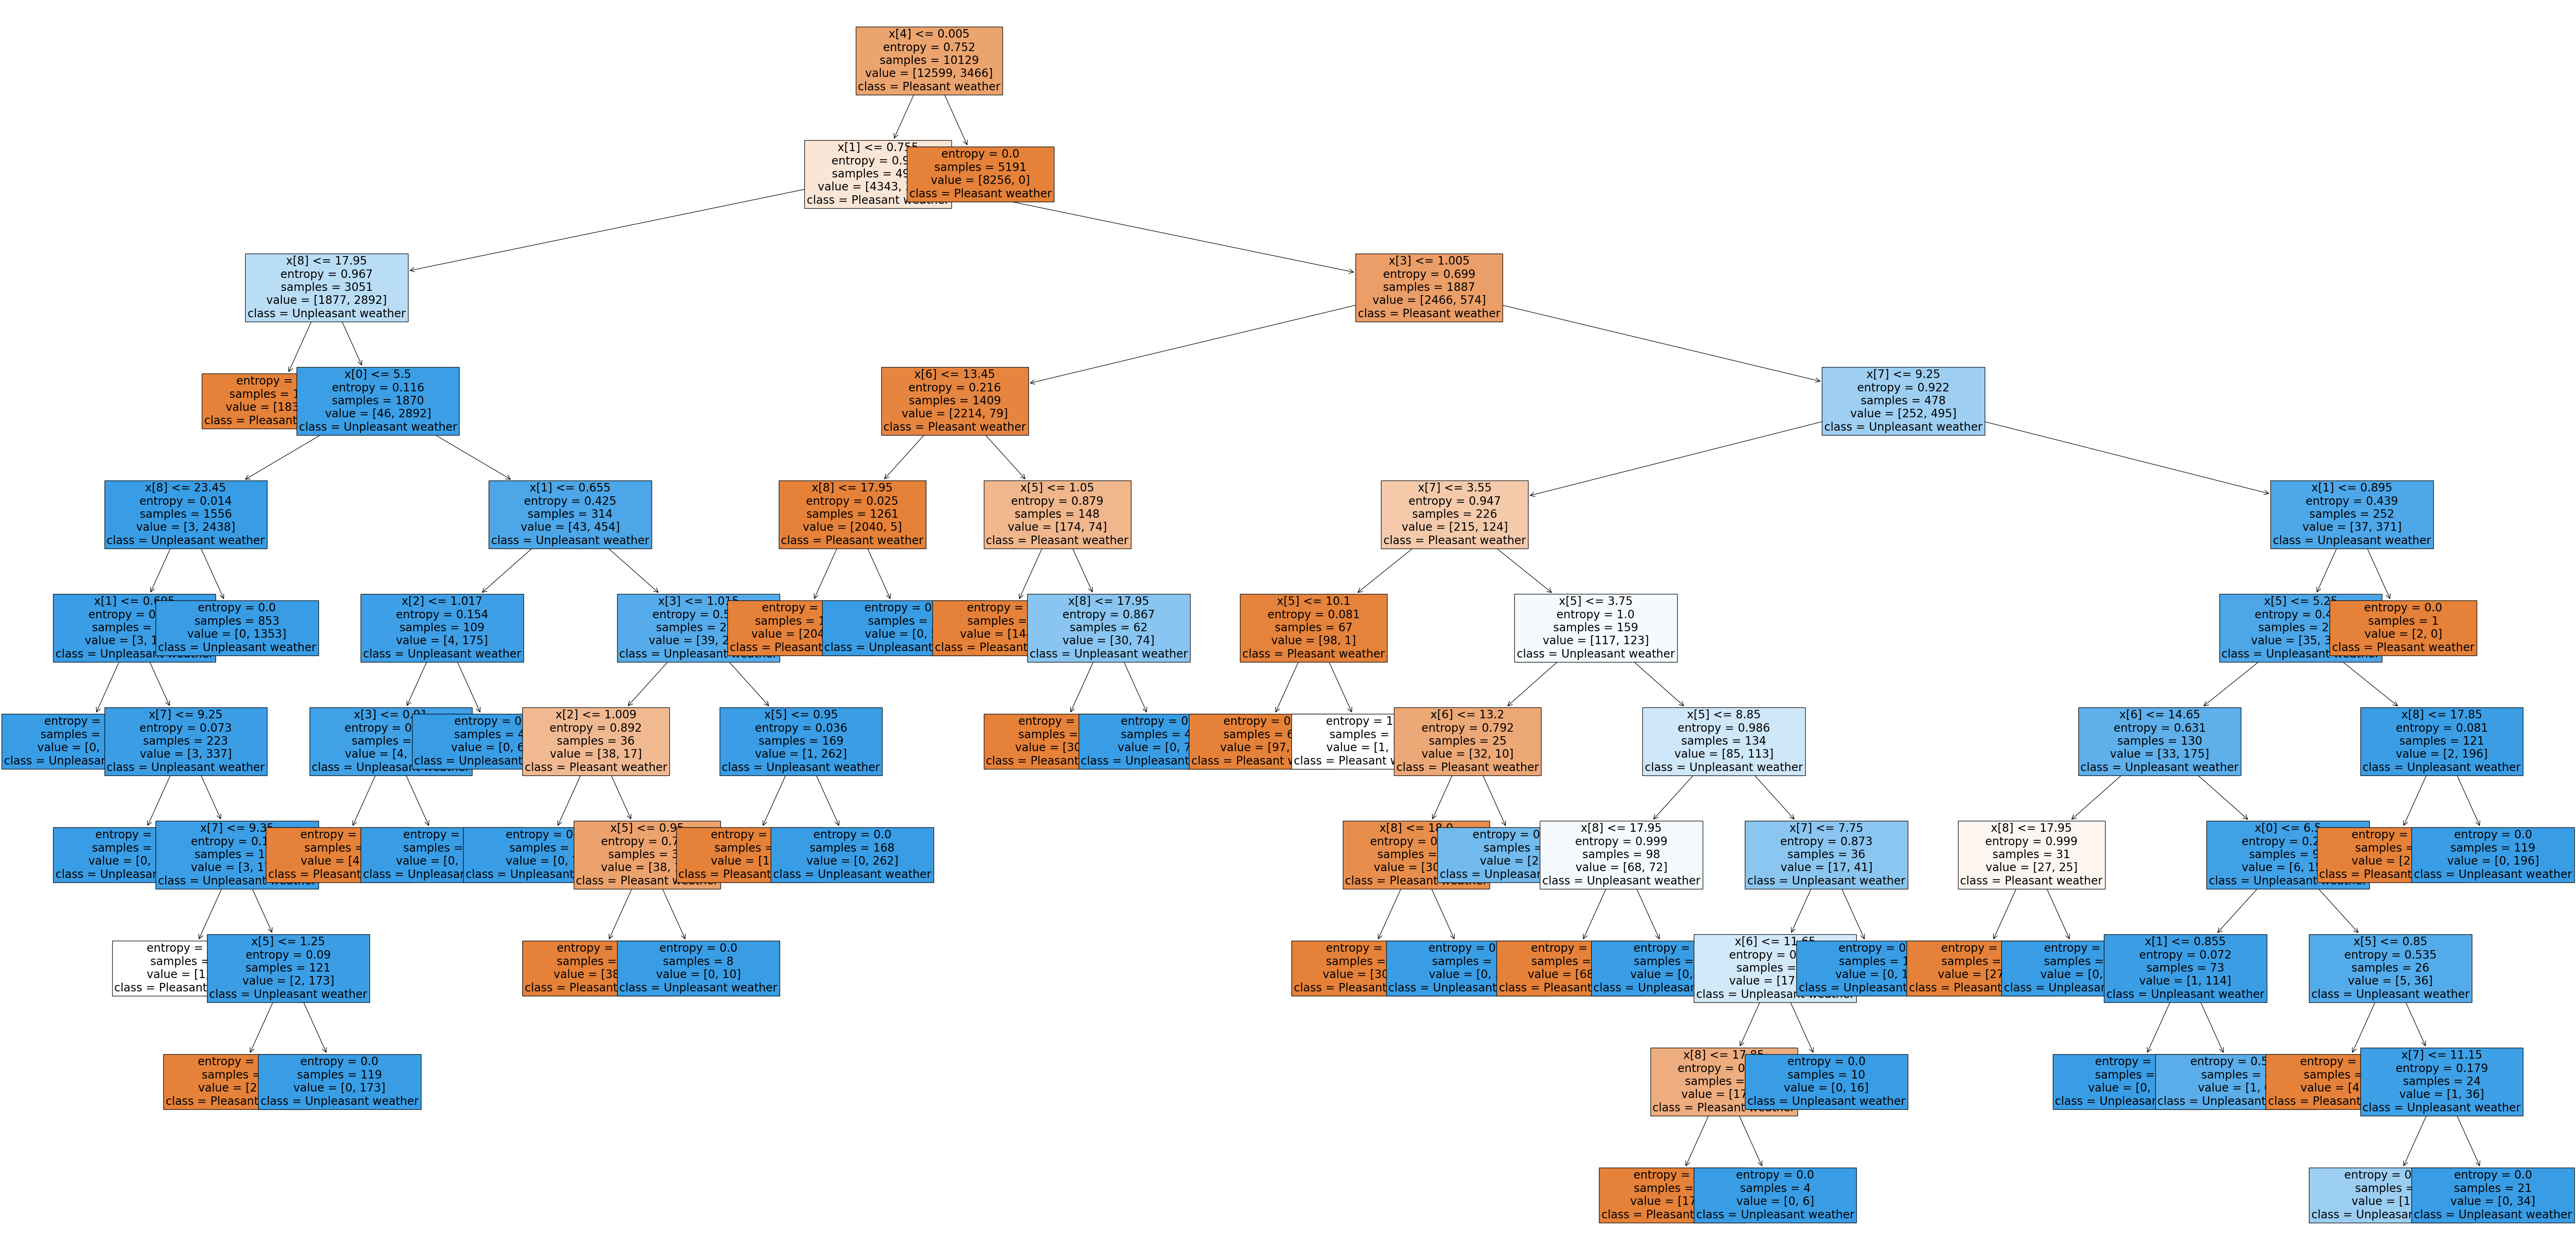

In [19]:
fig_1 = plt.figure(figsize=(80, 40))
plot_tree(clf_opt_1.estimators_[15], fontsize=20, class_names=predictions, filled=True)
plt.show()

In [20]:
#np.set_printoptions(threshold=np.inf)
newarray = clf_opt_1.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.02787993, 0.01404119, 0.00913188, 0.05470873, 0.34220024,
       0.07167774, 0.16685633, 0.01250358, 0.30100037])

In [21]:
np.set_printoptions(threshold=1000)

In [22]:
newarray = newarray.reshape(-1,1,9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.02787993, 0.01404119, 0.00913188, 0.05470873, 0.34220024,
         0.07167774, 0.16685633, 0.01250358, 0.30100037]]])

In [23]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.02787993, 0.01404119, 0.00913188, 0.05470873, 0.34220024,
       0.07167774, 0.16685633, 0.01250358, 0.30100037])

In [24]:
duss_col = X_duss.columns

In [25]:
important = pd.Series(sumarray, index = duss_col).sort_values(ascending = False)
important

DUSSELDORF_precipitation      0.34
DUSSELDORF_temp_max           0.30
DUSSELDORF_temp_mean          0.17
DUSSELDORF_sunshine           0.07
DUSSELDORF_global_radiation   0.05
DUSSELDORF_cloud_cover        0.03
DUSSELDORF_humidity           0.01
DUSSELDORF_temp_min           0.01
DUSSELDORF_pressure           0.01
dtype: float64

['precipitation', 'temp_max', 'temp_mean', 'sunshine', 'global_radiation', 'cloud_cover', 'humidity', 'temp_min', 'pressure']


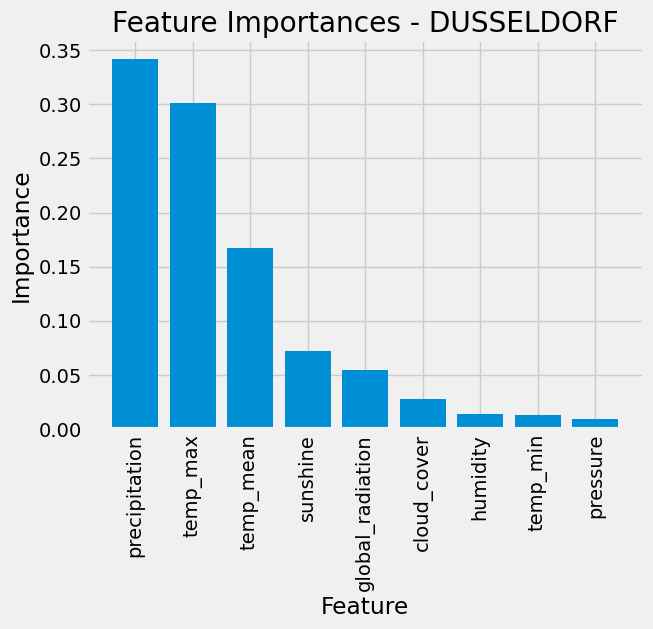

In [28]:
# Conduct variable importances by most influential feature
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
observations_1 = [feature.replace('DUSSELDORF_', '') for feature in important.index.tolist()]
print(observations_1)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, observations_1, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances - DUSSELDORF');

#### For Dusseldorf, the most importance features are precipitation, temp_max and temp_mean.